# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
from datetime import datetime, date, time
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [2]:
djs= pd.read_csv('/Users/samanthafalk/GA-DSI/Projects/project-03_SFalk/Iowa_Liquor_sales_sample_10pct.csv')
djs.head()
## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
djs.loc[djs['Zip Code'] == '712-2']

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
114,01/16/2015,4307,DUNLAP,712-2,43.0,Harrison,1062300.0,FLAVORED RUM,35,43136,Bacardi Limon,750,$8.50,$12.75,2,$25.50,1.50,0.40
2695,01/05/2015,4307,DUNLAP,712-2,43.0,Harrison,1012100.0,CANADIAN WHISKIES,115,11777,Black Velvet,1000,$6.63,$9.95,12,$119.40,12.00,3.17
4129,10/19/2015,4307,DUNLAP,712-2,43.0,Harrison,1012100.0,CANADIAN WHISKIES,115,10553,Black Velvet Cinnamon Rush,750,$6.75,$10.13,3,$30.39,2.25,0.59
5506,01/05/2015,4307,DUNLAP,712-2,43.0,Harrison,1081380.0,MISCELLANEOUS SCHNAPPS,65,82627,Dekuyper Cherry Pucker,1000,$7.62,$11.43,1,$11.43,1.00,0.26
5512,11/20/2015,4307,DUNLAP,712-2,43.0,Harrison,1051140.0,PEACH BRANDIES,434,56206,Paramount Peach Flavored Brandy,750,$5.48,$8.22,1,$8.22,0.75,0.20
8186,03/14/2016,4307,DUNLAP,712-2,NaN,NaN,1031080.0,VODKA 80 PROOF,55,35314,Barton Vodka,375,$1.71,$2.57,3,$7.71,1.12,0.30
8642,11/02/2015,4307,DUNLAP,712-2,43.0,Harrison,1081400.0,TRIPLE SEC,434,86310,La Prima Triple Sec,1000,$3.00,$4.50,1,$4.50,1.00,0.26
9347,03/21/2016,4307,DUNLAP,712-2,NaN,NaN,1081400.0,TRIPLE SEC,434,86310,La Prima Triple Sec,1000,$3.00,$4.50,3,$13.50,3.00,0.79
16502,12/26/2015,4307,DUNLAP,712-2,43.0,Harrison,1031200.0,VODKA FLAVORED,380,41783,Uv Blue Raspberry Vodka Mini,500,$4.89,$7.34,1,$7.34,0.50,0.13
16928,11/09/2015,4307,DUNLAP,712-2,43.0,Harrison,1062300.0,FLAVORED RUM,260,43287,Captain Morgan Parrot Bay Mango,750,$7.49,$11.24,1,$11.24,0.75,0.20


In [5]:
djs['Zip Code'].replace('712-2', '51529', inplace=True)

In [6]:
#djs['Zip Code'].unique()

In [7]:
#City only does not work to replace county, city +zip replaces all but 4... trying store # now

In [8]:
key=djs[['Store Number', 'County','County Number', 'Zip Code', 'City']]
key.drop_duplicates(inplace=True)

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [9]:
key.set_index('Store Number', inplace=True)

In [10]:
key=key[pd.notnull(key['County Number'])]

In [11]:
KeyHelp=key.T

In [12]:
KeyHelp

Store Number,3717,2614,2106,2501,3654,2569,2596,3456,4757,4346,...,4586,3826,4985,4737,4776,4338,9023,9018,5201,4778
County,Bremer,Scott,Black Hawk,Story,Wright,Linn,Wapello,Cerro Gordo,Polk,Benton,...,Calhoun,Clarke,Plymouth,Buena Vista,Carroll,Marshall,Carroll,Dubuque,Dubuque,Buena Vista
County Number,9,82,7,85,99,57,90,17,77,6,...,13,20,75,11,14,64,14,31,31,11
Zip Code,50674,52807,50613,50010,50421,52402,52501,50428,50035,52332,...,50579,50213,51038,50588,51401,50162,51401,52001,52001,50588
City,SUMNER,DAVENPORT,CEDAR FALLS,AMES,BELMOND,CEDAR RAPIDS,OTTUMWA,CLEAR LAKE,BONDURANT,SHELLSBURG,...,ROCKWELL CITY,OSCEOLA,MERRILL,STORM LAKE,CARROLL,MELBOURNE,Carroll,Dubuque,DUBUQUE,STORM LAKE


In [13]:
for i in range(len(djs['County Number'])):
    if np.isnan(djs['County Number'][i]):
        try:
            djs['County Number'][i]= KeyHelp[djs['Store Number'][i]][1]
        except: 
            djs['County Number'][i]
        


/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
for i in range(len(djs['County'])):
    try:
        if np.isnan(djs['County'][i]):
            djs['County'][i]= KeyHelp[djs['Store Number'][i]][0]
    except: 
        djs['County'][i]

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
key.set_index('Zip Code', inplace=True)
#key=key[pd.notnull(key['County Number'])]

In [16]:
KeyHelp=key.T

In [17]:
for i in range(len(djs['County Number'])):
    if np.isnan(djs['County Number'][i]):
        try:
            djs['County Number'][i]= KeyHelp[djs['Zip Code'][i]][1]
        except: 
            djs['County Number'][i]

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
for i in range(len(djs['County'])):
    try:
        if np.isnan(djs['County'][i]):
            djs['County'][i]= KeyHelp[djs['Zip Code'][i]][0]
    except: 
        djs['County'][i]

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
key.set_index('City', inplace=True)
KeyHelp=key.T


In [20]:
for i in range(len(djs['County Number'])):
    if np.isnan(djs['County Number'][i]):
        try:
            djs['County Number'][i]= KeyHelp[djs['City'][i]][1]
        except: 
            djs['County Number'][i]

In [21]:
for i in range(len(djs['County'])):
    try:
        if np.isnan(djs['County'][i]):
            djs['County'][i]= KeyHelp[djs['City'][i]][0]
    except: 
        djs['County'][i]

In [22]:
djs['Date_Formatted']=[datetime.strptime(x, '%m/%d/%Y').date() for x in djs['Date']]

In [23]:
#Converting Unicode to Floats
djs['State Bottle Cost'] = (djs['State Bottle Cost'].replace( '[\$,)]','', regex=True ).replace('[(]','-',   regex=True ).astype(float))
djs['State Bottle Retail'] = (djs['State Bottle Retail'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float))
djs['Sale (Dollars)'] = (djs['Sale (Dollars)'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float))


#Converting All Cities to Uppercase
djs['City'] = map(lambda x: x.upper(), djs['City'])

#Total Sales by Zip Code
djs_by_location = djs.groupby(['County', 'City', 'Zip Code'])['Sale (Dollars)'].agg(([np.sum]))

#Highest Sales by Zip Code
djs_by_location.sort_values('sum', ascending = False)

#Total Sales by Store in Each County - Shows Outliers
djs_by_store = djs.groupby(['County', 'Store Number'])['Sale (Dollars)'].agg(([np.sum]))
djs_by_store.sort_values('sum', ascending= False)

#Converting Dates to DateTime
djs['Date'] = pd.to_datetime(djs["Date"])

#Creating a ‘Year’ and ‘Month’ column
djs['Year'], djs['Month'] = djs['Date'].dt.year, djs['Date'].dt.month

djs['Profit'] = djs['Sale (Dollars)'] - (djs['State Bottle Cost'] * djs['Bottles Sold'])




In [24]:
djs.columns = djs.columns.str.strip()
djs.columns = [x.replace(' ', '_') for x in djs.columns]
djs.columns

Index([u'Date', u'Store_Number', u'City', u'Zip_Code', u'County_Number',
       u'County', u'Category', u'Category_Name', u'Vendor_Number',
       u'Item_Number', u'Item_Description', u'Bottle_Volume_(ml)',
       u'State_Bottle_Cost', u'State_Bottle_Retail', u'Bottles_Sold',
       u'Sale_(Dollars)', u'Volume_Sold_(Liters)', u'Volume_Sold_(Gallons)',
       u'Date_Formatted', u'Year', u'Month', u'Profit'],
      dtype='object')

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

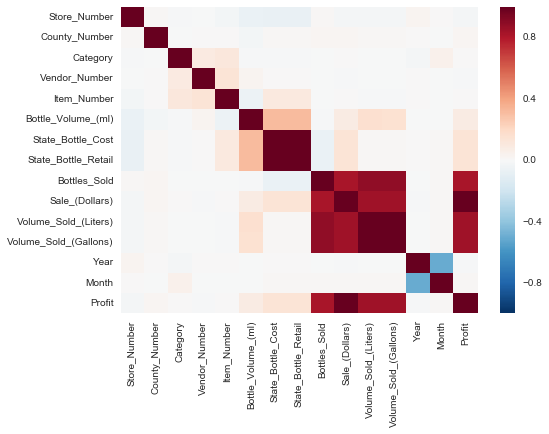

In [25]:
ax=sns.heatmap(djs.corr())
ax


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bae1f90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x129ee5cd0>]], dtype=object)

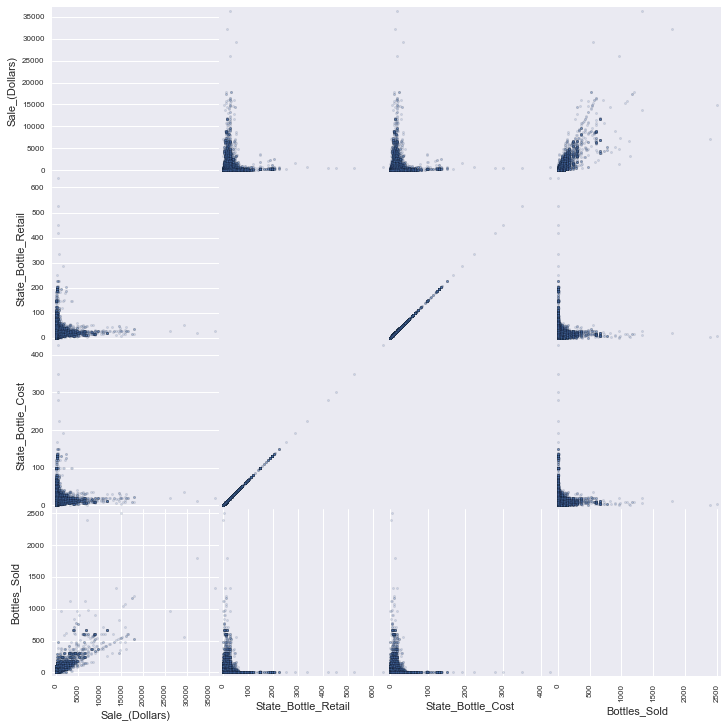

In [26]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(djs[['Date_Formatted', 'Zip_Code','Sale_(Dollars)', 'State_Bottle_Retail','State_Bottle_Cost', 'Bottles_Sold']], alpha=0.2, figsize=(12, 12), diagonal='Sale_(Dollars)')

   

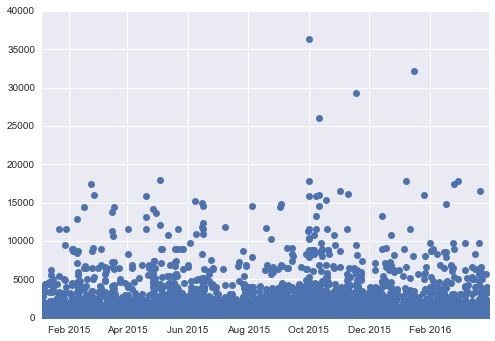

In [27]:
plt.plot_date(djs['Date_Formatted'], djs['Sale_(Dollars)'])
plt.show()

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [28]:
#drop nans that werent removed by previous work
djs.dropna(inplace=True)

In [29]:
from sklearn import linear_model
from datetime import datetime, date, time
train_data=djs.loc[djs['Year'] != 2016]
test_data=djs.loc[djs['Year'] == 2016]


In [30]:
#define train data X and Y
train_X=train_data[['State_Bottle_Cost', 'Bottles_Sold', 'County_Number' ]]
train_Y=train_data[['Sale_(Dollars)']]

In [31]:
#Define test X
test_X=test_data[['State_Bottle_Cost', 'Bottles_Sold', 'County_Number']]

In [32]:
#create linear model
lr=linear_model.LinearRegression()
lr_model=lr.fit(train_X,train_Y)
predictions=lr_model.predict(train_X)

MSE: 43034.8071689


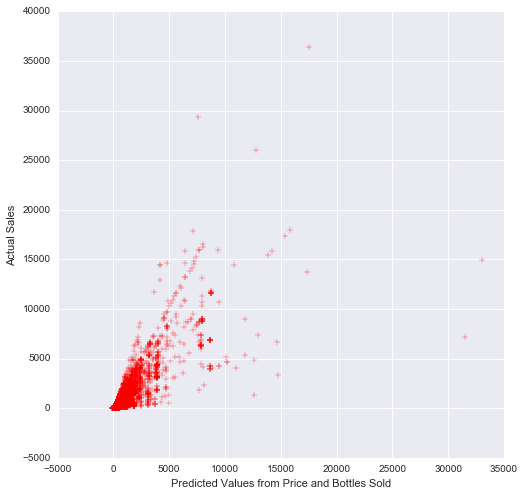

In [33]:
#plot predictions for test against y train values
print "MSE:", mean_squared_error(train_Y, predictions)
plt.figure(figsize=(8,8))
plt.scatter(predictions, train_Y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Price and Bottles Sold")
plt.ylabel("Actual Sales")
plt.show()

In [34]:
#create data to plug in to model
county_values= pd.pivot_table(djs, index='County_Number', values=['State_Bottle_Cost', 'Bottles_Sold'], aggfunc=np.sum)
county_values.reset_index(inplace=True)
county_values

,County_Number,Bottles_Sold,State_Bottle_Cost
0,1.0,4650,5438.68
1,2.0,955,2377.94
2,3.0,7450,10411.70
3,4.0,8171,9903.40
4,5.0,1694,1982.02
5,6.0,6449,9140.10
6,7.0,173131,140832.42
7,8.0,17233,19480.05
8,9.0,15428,22285.26
9,10.0,12876,15406.56


In [35]:
#find predictive total sales for each county
yhat_counties=lr_model.predict(county_values)
counties_predicted=pd.DataFrame(yhat_counties)


In [36]:
#test for how many stores in each county
djs_average_profit = djs.groupby([ 'County_Number', 'Store_Number'])['Profit'].agg(([np.sum]))



In [37]:
#create dataframe with count of stores for each County
Stores_County= pd.pivot_table(djs, index='County_Number', values=['Store_Number'], aggfunc=lambda x: len(x.unique()))
Stores_County.reset_index(inplace=True)
Stores_County.columns=['County_Number', 'Num_of_Stores']
Stores_County

,County_Number,Num_of_Stores
0,1.0,8
1,2.0,1
2,3.0,6
3,4.0,6
4,5.0,3
5,6.0,6
6,7.0,73
7,8.0,15
8,9.0,9
9,10.0,10


In [54]:
#create new table with predicted county values and make sales by thousands
CountyP_Df=pd.concat([county_values['County_Number'], counties_predicted/1000], axis=1)
CountyP_Df.columns=['County_Number', 'Total_Sales_Predicted']

#add store number as a column and then divide profit by stores
CountyP_Df=pd.concat([CountyP_Df, Stores_County['Num_of_Stores']], axis=1)
CountyP_Df['PSales_per_Store']=CountyP_Df['Total_Sales_Predicted']/CountyP_Df['Num_of_Stores']
CountyP_Df.sort('PSales_per_Store', ascending=False, inplace=True)
CountyP_Df.reset_index(inplace=True, drop=True)
top10Countystore= CountyP_Df.loc[:10, :]
CountyP_Df.sort('Total_Sales_Predicted', ascending=False, inplace=True)
CountyP_Df.reset_index(inplace=True, drop=True)
top10CountyTSales= CountyP_Df.loc[:10, :]

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


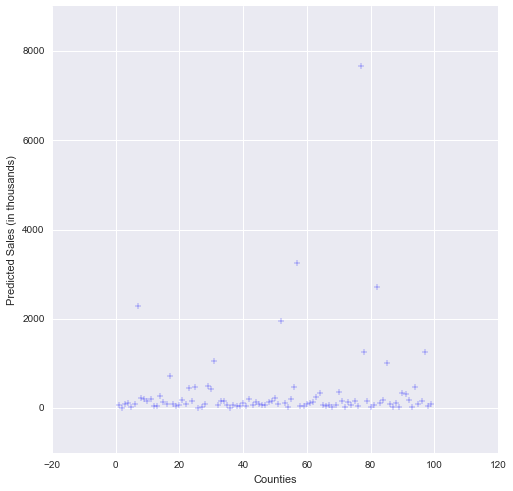

In [41]:
#plot counties and predicted total sales
plt.figure(figsize=(8,8))
plt.scatter(county_values['County_Number'], CountyP_Df['Total_Sales_Predicted'], s=30, c='blue', marker='+', zorder=10)
plt.xlabel("Counties")
plt.ylabel("Predicted Sales (in thousands)")
plt.show()

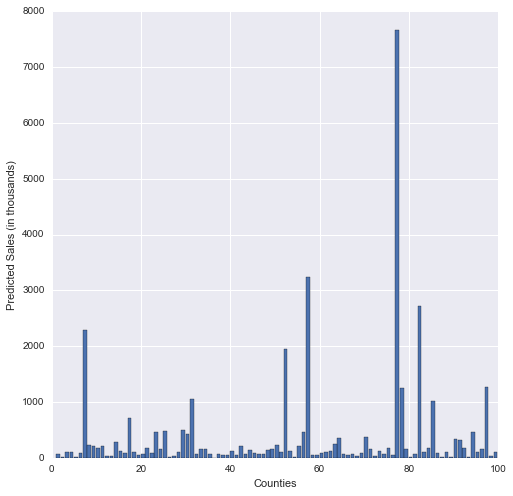

In [52]:
#plot 
plt.figure(figsize=(8,8))
plt.bar(CountyP_Df['County_Number'], CountyP_Df['Total_Sales_Predicted'])
plt.xlabel("Counties")
plt.ylabel("Predicted Sales (in thousands)")
plt.show()

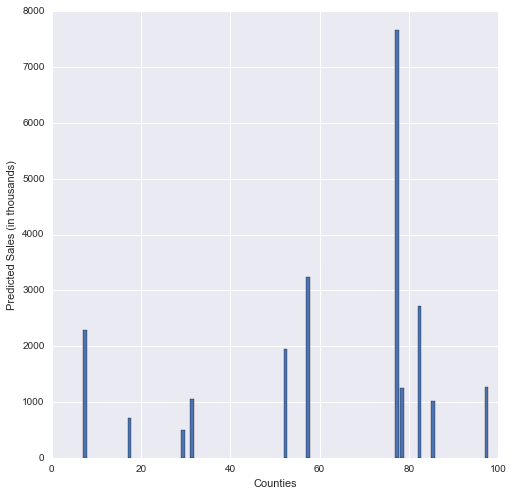

In [55]:
#plot 
plt.figure(figsize=(8,8))
plt.bar(top10CountyTSales['County_Number'], top10CountyTSales['Total_Sales_Predicted'])
plt.xlabel("Counties")
plt.ylabel("Predicted Sales (in thousands)")
plt.show()

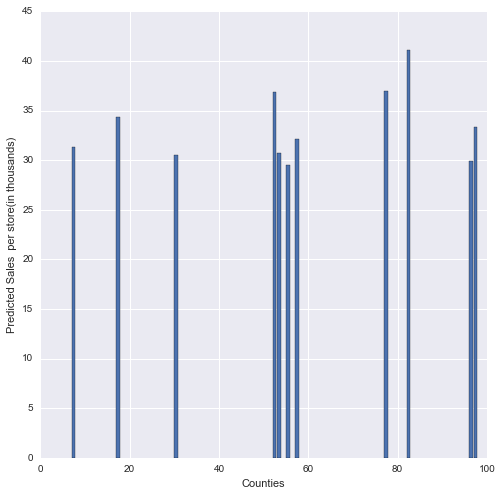

In [56]:
#plot 
plt.figure(figsize=(8,8))
plt.bar(top10Countystore['County_Number'], top10Countystore['PSales_per_Store'])
plt.xlabel("Counties")
plt.ylabel("Predicted Sales  per store(in thousands)")
plt.show()

In [58]:
lr_r2 = r2_score(train_Y, predictions)
lr_r2

0.71186213547837229

In [ ]:
len(lr_model.coef_)
lr_model.coef_

In [ ]:
lasso=linear_model.Lasso(alpha=1)
lasso_model=lasso.fit(X_train, y_train)

In [ ]:
y_true_lasso = y_train
y_pred_lasso = lasso_model.predict(X_train)
lasso_r2 = r2_score(y_true_lasso, y_pred_lasso)
lasso_r2

In [ ]:
y_hat=lasso_model.predict(X_test)
y_hat

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.